In [1]:
#Importing the libraries
from ExoPSI import exopsi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Initializing the class
exopsi = exopsi()

In [2]:
#Loading the dataset
P_df = pd.read_csv(r"phl_exoplanet_catalog.csv") 
new_df = P_df.loc[P_df['P_TEMP_SURF'].isna()==False]
new_df = new_df.loc[new_df['P_RADIUS'].isna()==False]
new_df = new_df.loc[new_df['P_MASS'].isna()==False]
new_df = new_df.loc[new_df['P_ESCAPE'].isna()==False]
new_df = new_df.loc[new_df['P_NAME'].isna()==False]
P_df = new_df
red_df = P_df.loc[:,['P_NAME','P_RADIUS','P_MASS','P_ESCAPE','P_TEMP_SURF']]
red_df.to_csv("reduced phl3.csv")
P_df = red_df
print(P_df)

            P_NAME  P_RADIUS    P_MASS  P_ESCAPE  P_TEMP_SURF
30        55 Cnc e   1.87207  7.990196  2.065940   2066.94610
33        61 Vir b   2.10748  5.085248  1.553368   1214.70880
63    BD-06 1339 b   2.84734  8.581356  1.736034    772.23385
72        CD Cet b   1.81602  3.950602  1.474930    492.19235
110      CoRoT-7 b   1.68150  4.077733  1.557259   1867.63490
...            ...       ...       ...       ...          ...
5204      pi Men c   2.06264  3.629596  1.326531   1203.64660
5210     tau Cet e   1.80481  3.931532  1.475928    328.42972
5211     tau Cet f   1.80481  3.931532  1.475928    208.66189
5212     tau Cet g   1.17705  1.751232  1.219760    661.75475
5213     tau Cet h   1.18826  1.830689  1.241228    488.04629

[2272 rows x 5 columns]


In [3]:
#Create dataset for Solar System Planets
solar_system_df = pd.read_csv(r"solar_system.csv")
solar_system_df

,P_NAME,P_RADIUS,P_MASS,P_ESCAPE,P_TEMP_SURF
0,Mercury,0.382,0.055,0.383,440
1,Venus,0.949,0.815,0.925,740
2,Earth,1.000,1.000,1.000,288
3,Mars,0.532,0.107,0.450,208
4,Jupiter,10.973,317.800,5.313,163
5,Saturn,9.140,95.160,3.222,133
6,Neptune,3.860,17.150,2.090,73


In [4]:
C_df = pd.read_csv(r"Planet Type.csv")
C_df = C_df.set_index('Planet Type')
print(C_df)

             Min. Radius (EU)  Max. Radius (EU)  Min. Mass (EU)  \
Planet Type                                                       
Subterran                 0.4               0.8             0.1   
Terran                    0.8               1.6             0.5   
Superterran               1.6               2.5             3.0   

             Max. Mass (EU)  Min. Escape (EU)  Max. Escape (EU)  \
Planet Type                                                       
Subterran               0.5              0.35              1.11   
Terran                  3.0              0.56              1.93   
Superterran            10.0              1.09              2.50   

             Ref Val Rad (EU)  Ref Val Mass (EU)  Ref Val Esc (EU)  
Planet Type                                                         
Subterran                0.78               0.39              0.70  
Terran                   1.00               1.00              1.00  
Superterran              2.37               8.92    

In [5]:
O_df = pd.read_csv(r"reduced thermobase.csv")
O_df = O_df.set_index('Name')
print(O_df)

              Unnamed: 0  Min. Temp. (K)  Max. Temp. (K)  \
Name                                                       
Colwellia              0             253             293   
Methanopyrus           1             357             395   

              Avg. Optimum Temp. (K)  
Name                                  
Colwellia                        282  
Methanopyrus                     371  


In [6]:
for j in O_df.index:
    print(j)
    for i in C_df.index:
        print(i)
        upper_lims=[C_df.loc[i,'Max. Radius (EU)'],C_df.loc[i,'Max. Mass (EU)'],C_df.loc[i,'Max. Escape (EU)'],O_df.loc[j,'Max. Temp. (K)']]
        lower_lims = [C_df.loc[i,'Min. Radius (EU)'],C_df.loc[i,'Min. Mass (EU)'],C_df.loc[i,'Max. Escape (EU)'],O_df.loc[j,'Min. Temp. (K)']]
        ref_val = [C_df.loc[i,'Ref Val Rad (EU)'],C_df.loc[i,'Ref Val Mass (EU)'],C_df.loc[i,'Ref Val Esc (EU)'],O_df.loc[j,'Avg. Optimum Temp. (K)']]
        weights = exopsi.calc_weight(ref_val,upper_lims,lower_lims)
        C_df.loc[i,'W_Temp'] = weights[3]
    


Colwellia
Subterran
The calculated weight(s) is(are): [3.17, 0.65, 0.87, 6.8]
Terran
The calculated weight(s) is(are): [1.27, 0.42, 0.58, 6.8]
Superterran
The calculated weight(s) is(are): [2.92, 1.11, 1.66, 6.8]
Methanopyrus
Subterran
The calculated weight(s) is(are): [3.17, 0.65, 0.87, 8.98]
Terran
The calculated weight(s) is(are): [1.27, 0.42, 0.58, 8.98]
Superterran
The calculated weight(s) is(are): [2.92, 1.11, 1.66, 8.98]


C:\Users\mailm\AppData\Local\Temp\ipykernel_10384\3205152932.py:4: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  writer = pd.ExcelWriter("PSI_therm.xlsx",engine='xlsxwriter',options=options)


Colwellia
Subterran


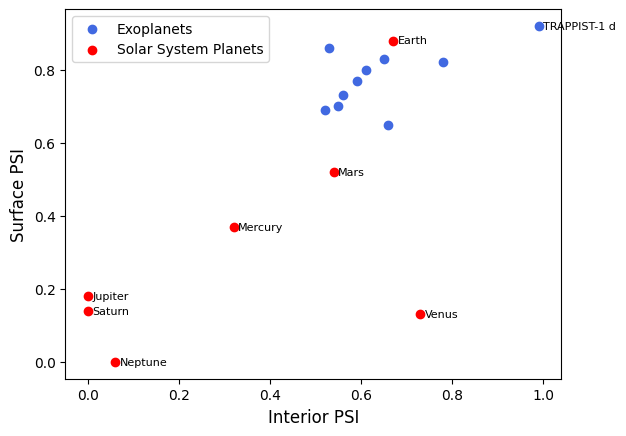

Terran


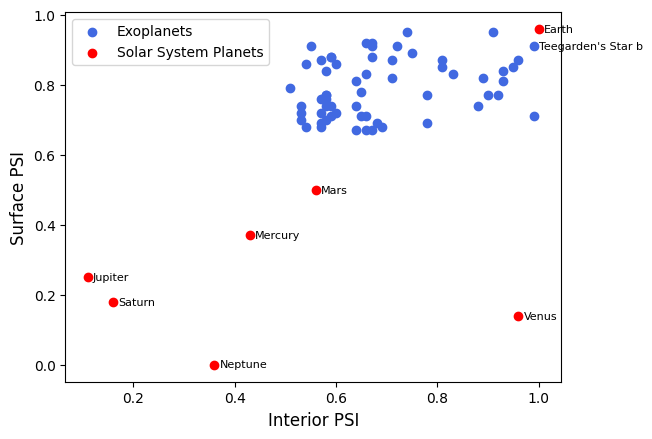

Superterran


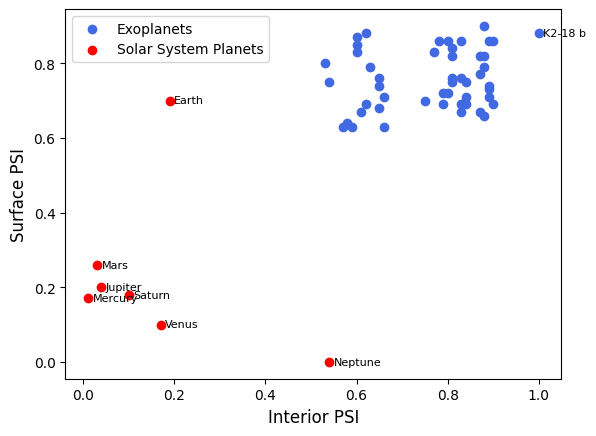

Methanopyrus
Subterran


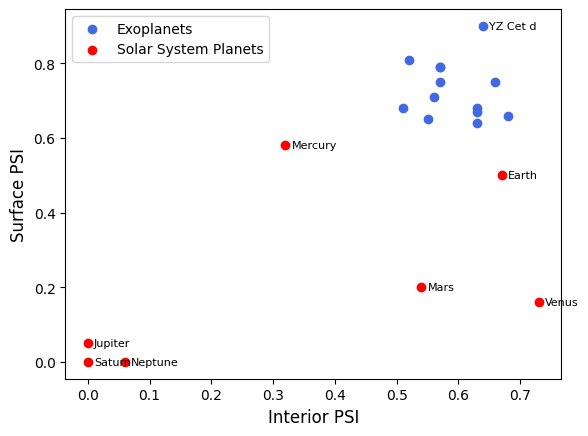

Terran


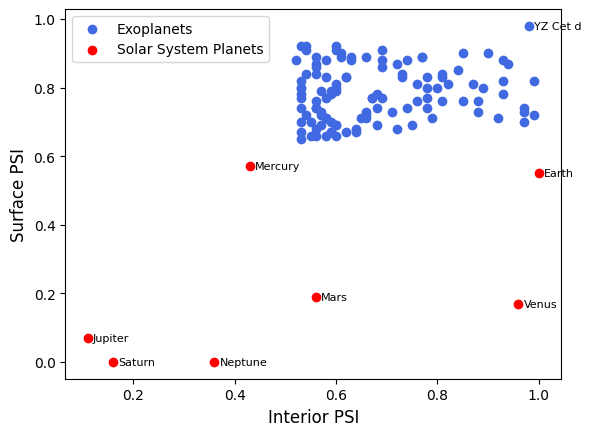

Superterran


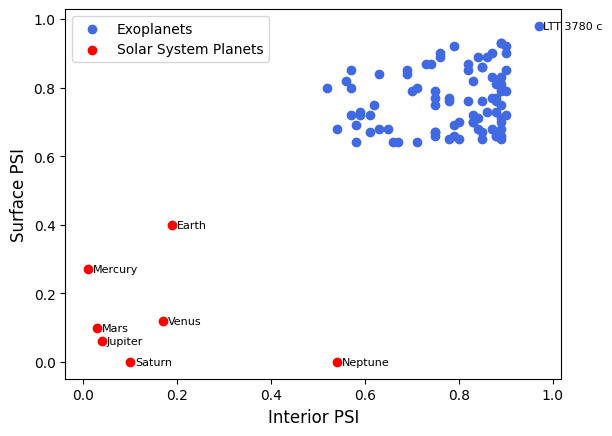

[10, 60, 49, 13, 113, 86]


In [7]:
options = {}
options['strings_to_formulas'] = False
options['strings_to_urls'] = False
writer = pd.ExcelWriter("PSI_therm.xlsx",engine='xlsxwriter',options=options)
planet_count=[]
for j in O_df.index:
    print(j)
    for i in C_df.index:
        print(i)
        upper_lims=[C_df.loc[i,'Max. Radius (EU)'],C_df.loc[i,'Max. Mass (EU)'],C_df.loc[i,'Max. Escape (EU)'],O_df.loc[j,'Max. Temp. (K)']]
        lower_lims = [C_df.loc[i,'Min. Radius (EU)'],C_df.loc[i,'Min. Mass (EU)'],C_df.loc[i,'Max. Escape (EU)'],O_df.loc[j,'Min. Temp. (K)']]
        ref_val = [C_df.loc[i,'Ref Val Rad (EU)'],C_df.loc[i,'Ref Val Mass (EU)'],C_df.loc[i,'Ref Val Esc (EU)'],O_df.loc[j,'Avg. Optimum Temp. (K)']]
        PSI_data = exopsi.calc_psi(P_df[['P_RADIUS','P_MASS','P_ESCAPE','P_TEMP_SURF']],
                            upper_lims,lower_lims,ref_val,0.8,
                            surf_param=['P_ESCAPE','P_TEMP_SURF'],
                            int_param=['P_RADIUS','P_MASS'],
                            p_index=P_df.loc[:,'P_NAME'])
        
        solar_system_data = exopsi.calc_psi(solar_system_df[['P_RADIUS','P_MASS','P_ESCAPE','P_TEMP_SURF']],
                            upper_lims,lower_lims,ref_val,0.8,
                            surf_param=['P_ESCAPE','P_TEMP_SURF'],
                            int_param=['P_RADIUS','P_MASS'],
                            p_index=solar_system_df.loc[:,'P_NAME'])
        
        PSI_data = PSI_data.query('PSI_P_TEMP_SURF >= 0.5')
        PSI_data = PSI_data.query('PSI_P_RADIUS >= 0.5')
        PSI_data = PSI_data.query('PSI_P_MASS >= 0.5')
        PSI_data = PSI_data.query('PSI_P_ESCAPE >= 0.5')
        PSI_data = PSI_data.sort_values('PSI_Global',ascending = False)
        no_of_planets = len(PSI_data)

        planet_count.append(no_of_planets)

        if ('/' in i):
            i = i.replace('/','_')
        if len(i) > 31:
            i = i[0:31]
            
        
        PSI_data.to_excel(writer, sheet_name="{}_{}".format(j,i),index=False)
        #solar_system_data.to_excel(writer,sheet_name="solar_sys_values", index=False)

        fig,ax = plt.subplots()
        ax.scatter(x=PSI_data['PSI_Interior'], y=PSI_data['PSI_Surface'], color="royalblue")
        ax.scatter(x=solar_system_data['PSI_Interior'], y=solar_system_data['PSI_Surface'], color="red")
        plt.xlabel("Interior PSI", fontsize=12, fontweight="roman")
        plt.ylabel("Surface PSI", fontsize=12, fontweight="roman")
        plt.xticks(fontweight="roman")
        plt.yticks(fontweight="roman")
        plt.legend(['Exoplanets','Solar System Planets'])
        for (x,y,text) in zip(solar_system_data['PSI_Interior'],solar_system_data['PSI_Surface'], solar_system_data['P.Name']):
            plt.text(x+0.01,y,text, fontsize=8,horizontalalignment='left', verticalalignment='center')
        for (x,y,text) in zip(PSI_data.loc[PSI_data.index[0:1],'PSI_Interior'],PSI_data.loc[PSI_data.index[0:1],'PSI_Surface'], PSI_data.loc[PSI_data.index[0:1],'P.Name']):
            plt.text(x+0.01,y,text, fontsize=8,horizontalalignment='left', verticalalignment='center')
       
        plt.show()

        
writer.save()
print(planet_count)


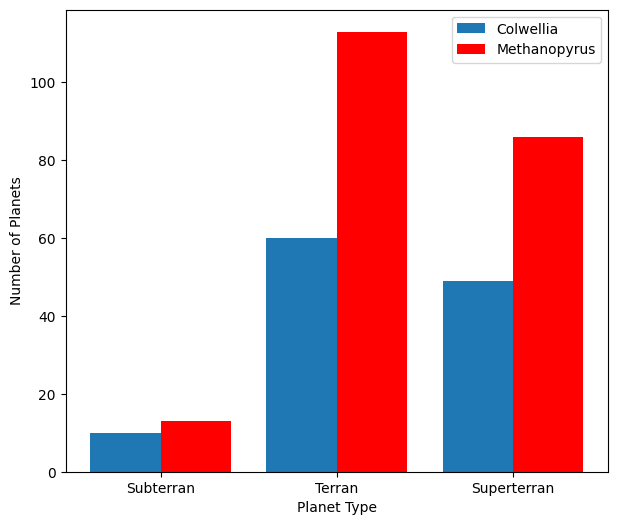

In [8]:
#Histogram 
#X-Axis - Planet Type
#Y-Axis - No. of Planets 
from matplotlib.pyplot import figure

Colwellia_vals = planet_count[:3]
Methanopyrus_vals = planet_count[3:]
X = ['Subterran', 'Terran', 'Superterran']
X_axis = np.arange(len(X))

figure(figsize=(7, 6))
plt.bar(X_axis-0.2 , Colwellia_vals,0.4, label="Colwellia")
plt.bar(X_axis+0.2, Methanopyrus_vals,0.4, label="Methanopyrus", color="red")
plt.xlabel("Planet Type", fontweight="roman")
plt.ylabel("Number of Planets", fontweight="roman")
plt.xticks(X_axis, X, fontweight="roman")
plt.legend()

# for index, value in enumerate(Colwellia_vals):
#     plt.text(value, index,str(value))

# for index, value in enumerate(Methanopyrus_vals):
#     plt.text(value, index, str(value))
    


plt.show()